<a href="https://colab.research.google.com/github/SiddharthKalla/CIFAR_sequential_model/blob/main/CIFAR_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification on CIFAR10 Dataset**

Importing neccessary Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

Loading the Required dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()    

170500096/170498071 [==============================] - 2s 0us/step


Plotting 10 images from the training Data  

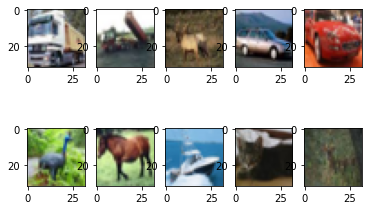

In [4]:
for i in range(1,11):
  plt.subplot(2, 5, i)
  plt.imshow(x_train[i])

Normalizing Data for using 

In [5]:
x_train = x_train.astype("float32") / 255                                       #Normalised both training and testing data
x_test = x_test.astype("float32") / 255

Building the model which will be sed for classification

In [6]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape= (32,32,3)),                                #Input intialized with a shape of 32x32 in RGB format
        tf.keras.layers.Conv2D(32, 3, padding = "valid", activation = "relu"),  #Conv2D layer added with a filter of size 3x3 and activation function = relu
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),                        #MaxPooling layer added with apool size = 2x2
        tf.keras.layers.Conv2D(64, 3, activation = "relu"),                     #Conv2D layer added with a filter of size 3x3 and activation function = relu                              
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),                        #MaxPooling layer added
        tf.keras.layers.Conv2D(128, 3, activation = "relu"),                    #Conv2D layer added with a filter of size 3x3 and activation function = relu
        tf.keras.layers.Flatten(),                                              #Added an flatten layer to flatten the complete image and get vectors of size (2048,)
        tf.keras.layers.Dense(64, activation = "relu"),                         #Added an Dense layer with an activation function = relu and 64 nodes
        tf.keras.layers.Dense(10),                                              #Added a final Dense layer of 10 nodes
    
    ]
)

Printing the summary of the model which includes shapes of each layer

In [6]:
model.summary()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

Printing the block diagram for model 

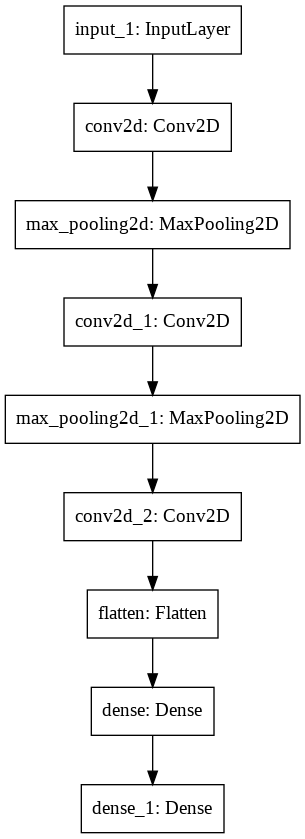

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'model.png')

Compiling the build model

In [23]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),      #Loss specified that has to be used = SparseCategoricalCrossentropy
    optimizer = keras.optimizers.Adam(lr = 3e-4),                               #Optimizer used is Adam for the model with learning rate = 3e-4
    metrics =["accuracy"],                                                      #Accuracy metrics to be used while fitting and evaluating 
    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Training our Model

In [9]:
#model.fit function for the training data with a batch of 64 for 10 epochs
model_history = model.fit(x_train, y_train, batch_size = 64, epochs = 10,       
                          verbose = 2)   

Epoch 1/10
782/782 - 34s - loss: 1.6900 - accuracy: 0.3877
Epoch 2/10
782/782 - 2s - loss: 1.3595 - accuracy: 0.5125
Epoch 3/10
782/782 - 2s - loss: 1.2383 - accuracy: 0.5613
Epoch 4/10
782/782 - 2s - loss: 1.1488 - accuracy: 0.5961
Epoch 5/10
782/782 - 2s - loss: 1.0787 - accuracy: 0.6228
Epoch 6/10
782/782 - 2s - loss: 1.0175 - accuracy: 0.6443
Epoch 7/10
782/782 - 2s - loss: 0.9634 - accuracy: 0.6661
Epoch 8/10
782/782 - 2s - loss: 0.9184 - accuracy: 0.6813
Epoch 9/10
782/782 - 2s - loss: 0.8811 - accuracy: 0.6945
Epoch 10/10
782/782 - 2s - loss: 0.8426 - accuracy: 0.7090


Checking accuracy and loss on the Testing Dataset

In [26]:
#model.fit function for the training data with a batch of 64 for 10 epochs
model_history_test = model.fit(x_test, y_test, batch_size = 64, epochs = 1,       
                          verbose = 2)   

157/157 - 1s - loss: 0.6205 - accuracy: 0.7874


Visualizing Accuracy

<function matplotlib.pyplot.show>

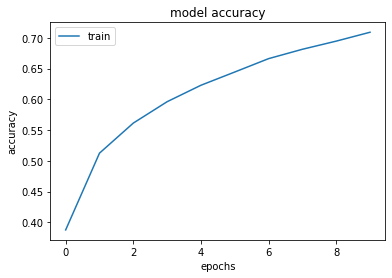

In [14]:
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show

Visualizing Loss

<function matplotlib.pyplot.show>

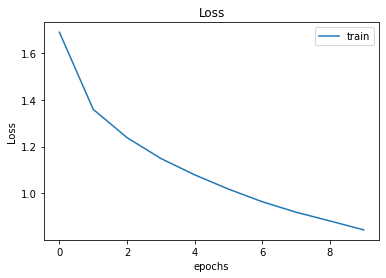

In [11]:
plt.plot(model_history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper right')
plt.show

Predicting Output class for random input

Output Label: 8
ship


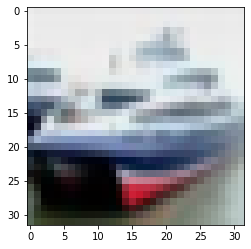

In [18]:
plt.imshow(x_test[1])

labels = ["airplane","automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]
import cv2

resized_img = cv2.resize(x_test[1], (32,32))
resized_img= np.expand_dims(resized_img, axis=0)

pre=model.predict(resized_img)
n = np.argmax(pre)                                                     

print("Output Label:", n)
print(labels[n])                                                                                                     